In [407]:
import pandas, os, numpy as np, collections
import os, sklearn, pandas, numpy as np
from sklearn import svm
import skimage
from skimage import io, filters
from utils import utils # custom functions, in local environment
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
%matplotlib inline

In [2]:
## NN libs
import keras
from sklearn.decomposition import PCA
from keras.utils import to_categorical
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Conv3D, MaxPool2D, Dropout, Flatten

In [3]:
import data, config, tfidf, models
from utils import io

 Dataset :: namedtuple(
  'info': pandas.df
  'labels': pandas.df('filename.txt': 'genre')
  'genres': ['genre'] # unique genres
  'label_dataset': SubDataset
  'sentiment_dataset': SubDataset
  'book_sentiment_words_list': ['filename']

 SubDataset :: namedtuple(
   'dict_index_to_label' = dict to convert label_index -> label_name
   'dict_label_to_index'= dict to convert label_name -> label_index



In [4]:
# info = pandas.read_csv(config.dataset_dir + 'final_data.csv')
dataset = data.init_dataset()
dataset.info.keys()

Index(['title', 'filename', 'title.1', 'author', 'release year', 'genre',
       'pos score', 'neg score', 'neu score', 'comp score', 'amt pos',
       'amt neg'],
      dtype='object')

In [125]:
len(dataset.book_sentiment_words_list)

744

In [105]:
amt = 800
train = dataset.book_sentiment_words_list[:amt]
test = dataset.book_sentiment_words_list[amt:]

In [106]:
x_train, y_train = data.extract_all(dataset, train)
x_test, y_test = data.extract_all(dataset, test)

In [107]:
dataset.labels

,1005.txt,1024.txt,1027.txt,103.txt,1051.txt,1056.txt,106.txt,1066-0.txt,1080.txt,1081.txt,...,9845-8.txt,9845.txt,9846-8.txt,9846.txt,9858-8.txt,9858.txt,9865-8.txt,9865.txt,9909.txt,996.txt
0,christian,adventur,western,travel,comic,knstlerroman,adventur,children,satir,polit,...,spi,spi,fantasi,fantasi,poetri magazin,poetri magazin,world war ii,world war ii,gothic,novel


In [108]:
dataset.info

,title,filename,title.1,author,release year,genre,pos score,neg score,neu score,comp score,amt pos,amt neg
0,Jonah,3678.txt,Jonah,Louis Stone,"January, 2003",poetri,0.063752,0.064028,0.670289,0.001590,2058,2017
1,King--of the Khyber Rifles,6066.txt,King--of the Khyber Rifles,Talbot Mundy,"July, 2004",adventur,0.056072,0.044295,0.660100,0.020974,2518,2115
2,The Wind in the Willows,289.txt,The Wind in the Willows,Kenneth Grahame,"July, 1995",children,0.075622,0.049711,0.708466,0.050425,1684,1172
3,Akbar,40155-8.txt,Akbar,P. A. S. van Limburg-Brouwer,"July 7, 2012",syair,0.088927,0.047641,0.701412,0.078233,2988,1652
4,Erewhon,1906.txt,Erewhon,Samuel Butler,"March 20, 2005",satir,0.075006,0.061587,0.750951,0.025886,2506,1952
5,Night and Day,1245.txt,Night and Day,Virginia Woolf,"March, 1998",romance,0.070135,0.048907,0.711205,0.043948,4822,3088
6,She and Allan,5745.txt,She and Allan,H. Rider Haggard,"April 22, 2006",fantasi,0.067608,0.057010,0.693447,0.020357,3234,2652
7,The Amateur Cracksman,706.txt,The Amateur Cracksman,E. W. Hornung,"November, 1996",crime,0.059576,0.045972,0.663071,0.026517,1363,1072
8,Anne of Geierstein,44247-8.txt,Anne of Geierstein,Walter Scott,"November 21, 2013",histor,0.080691,0.054442,0.716062,0.048409,3268,2205
9,A Tramp Abroad,5786.txt,A Tramp Abroad,Mark Twain (Samuel Clemens),March 1994,travel,0.062378,0.037464,0.720202,0.047015,642,387


In [9]:
y_train

['christian',
 'adventur',
 'western',
 'travel',
 'comic',
 'knstlerroman',
 'adventur',
 'children',
 'satir',
 'polit',
 'children',
 'children',
 'young adult',
 'science fiction',
 'satir',
 'detect',
 'dystopian',
 'horror',
 'children',
 'adventur',
 'unknown',
 'frame stori',
 'histor',
 'science',
 'cryptozoolog',
 'romance',
 'histor',
 'histor',
 'histor',
 'romantic',
 'romantic',
 'adventur',
 'nonsens poetri',
 'nonfict',
 'adventur',
 'adventur',
 'science fiction',
 'science fiction',
 'short stori',
 'lost world genr',
 'lost world genr',
 'fantasi',
 'fantasi',
 'science fiction',
 'literari realism',
 'literari realism',
 'children',
 'novel',
 'novel',
 'novel',
 'histor',
 'thriller',
 'children',
 'nonfict',
 'fantasi',
 'bildungsroman',
 'nonprofit',
 'biographi',
 'autobiographi',
 'fantasi',
 'fantasi',
 'novel',
 'novel',
 'literari realism',
 'juvenil',
 'novel of manner',
 'black comedi',
 'mysteri',
 'science fiction',
 'unknown',
 'histor',
 'romance',
 's

### Prepare the labels

Encode the labels to one-hot vectors

In [109]:
y_train, y_test = data.labels_to_vectors(dataset.label_dataset,y_train, y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Convert tokenlist to vectors

### Using sentiment-wordlist

In [11]:
b = dataset.sentiment_dataset
a = 'a s d fp sks dk fsji sdf'.split(' ')
data.tokenlist_to_vector(a,b)

array([0., 0., 0., ..., 0., 0., 0.])

### Using polarization scores

In [12]:
data.polarization_scores_to_vector(dataset,'706.txt')

array([0.05957593, 0.04597156, 0.66307096, 0.02651661])

### Using NER scores

In [13]:
# ...

## Train a model
Although most of the input consists of classes, many classes will be correlated (e.g. related genres).
Therefore a neural network is chosen to model the data

In [110]:
x_train2 = models.to_vector(x_train, dataset)
x_train2.shape

(600, 5096)

In [111]:
n_samples = len(x_train2) # = length of the list of images (matrices)
input_shape = x_train2.shape[1:] # = shape of an individual image (matrix)
output_length = (y_train[0]).shape[0] # = length of an individual label
print(n_samples, input_shape)
print('output length', output_length)

600 (5096,)
output length 113


In [120]:
# import models # src/models.py
dropout = 0.20
# model, summary = models.sequential(input_shape, output_length, dropout)
def sequential(input_shape, output_length, dropout=0.10):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=input_shape))
    #model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(output_length, activation='softmax'))
    # in addition, return a function that displays information about the model
    return model, model.summary

model, summary = sequential(input_shape, output_length, dropout)

summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 256)               1304832   
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 113)               29041     
Total params: 1,333,873
Trainable params: 1,333,873
Non-trainable params: 0
_________________________________________________________________


## Loss function
- Categorical cross-entropy loss

In [121]:
learning_rate = 0.0001
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Finally train the model

In [122]:
# Compute a batch size
batch_size = round(16)
# n epochs = n iterations over all the training data
epochs = 220

.

### Show logs [here](http://localhost:6006/#scalars)

When training a new model, close any _Tenserboard_ tab,

then run ` make logs ` and start training.

.

In [124]:
use_validation_split = True
# use_validation_split = False

if use_validation_split:
    model.fit(x_train2, y_train, epochs=epochs, batch_size=batch_size, validation_split=1/6, callbacks=[TensorBoard(log_dir=config.tmp_model_dir)])
else:    
    model.fit(x_train2, y_train, epochs=epochs, batch_size=batch_size)

Train on 500 samples, validate on 100 samples
Epoch 1/200
500/500 [==============================] - 1s 3ms/step - loss: 0.8772 - acc: 0.8840 - val_loss: 4.3365 - val_acc: 0.2900
Epoch 2/200
500/500 [==============================] - 1s 2ms/step - loss: 0.8745 - acc: 0.8760 - val_loss: 4.3307 - val_acc: 0.2900
Epoch 3/200
500/500 [==============================] - 1s 2ms/step - loss: 0.8710 - acc: 0.8740 - val_loss: 4.3323 - val_acc: 0.2900
Epoch 4/200
500/500 [==============================] - 1s 2ms/step - loss: 0.8593 - acc: 0.8920 - val_loss: 4.3356 - val_acc: 0.2900
Epoch 5/200
500/500 [==============================] - 1s 2ms/step - loss: 0.8592 - acc: 0.8840 - val_loss: 4.3409 - val_acc: 0.2900
Epoch 6/200
500/500 [==============================] - 1s 2ms/step - loss: 0.8198 - acc: 0.8980 - val_loss: 4.3356 - val_acc: 0.3000
Epoch 7/200
500/500 [==============================] - 1s 2ms/step - loss: 0.8284 - acc: 0.8980 - val_loss: 4.3320 - val_acc: 0.3000
Epoch 8/200
500/500 [==

Epoch 62/200
500/500 [==============================] - 1s 3ms/step - loss: 0.4723 - acc: 0.9560 - val_loss: 4.4017 - val_acc: 0.2800
Epoch 63/200
500/500 [==============================] - 1s 2ms/step - loss: 0.4666 - acc: 0.9540 - val_loss: 4.3987 - val_acc: 0.2800
Epoch 64/200
500/500 [==============================] - 1s 2ms/step - loss: 0.4611 - acc: 0.9500 - val_loss: 4.3998 - val_acc: 0.2700
Epoch 65/200
500/500 [==============================] - 1s 2ms/step - loss: 0.4551 - acc: 0.9580 - val_loss: 4.4010 - val_acc: 0.2700
Epoch 66/200
500/500 [==============================] - 1s 2ms/step - loss: 0.4528 - acc: 0.9500 - val_loss: 4.3974 - val_acc: 0.2700
Epoch 67/200
500/500 [==============================] - 1s 2ms/step - loss: 0.4447 - acc: 0.9500 - val_loss: 4.3953 - val_acc: 0.2800
Epoch 68/200
500/500 [==============================] - 1s 2ms/step - loss: 0.4434 - acc: 0.9560 - val_loss: 4.4028 - val_acc: 0.2800
Epoch 69/200
500/500 [==============================] - 1s 2ms

Epoch 123/200
500/500 [==============================] - 1s 2ms/step - loss: 0.2450 - acc: 0.9760 - val_loss: 4.4545 - val_acc: 0.2800
Epoch 124/200
500/500 [==============================] - 1s 2ms/step - loss: 0.2347 - acc: 0.9740 - val_loss: 4.4519 - val_acc: 0.2800
Epoch 125/200
500/500 [==============================] - 1s 2ms/step - loss: 0.2317 - acc: 0.9820 - val_loss: 4.4538 - val_acc: 0.2800
Epoch 126/200
500/500 [==============================] - 1s 2ms/step - loss: 0.2320 - acc: 0.9820 - val_loss: 4.4556 - val_acc: 0.2800
Epoch 127/200
500/500 [==============================] - 1s 2ms/step - loss: 0.2259 - acc: 0.9800 - val_loss: 4.4585 - val_acc: 0.2800
Epoch 128/200
500/500 [==============================] - 1s 3ms/step - loss: 0.2240 - acc: 0.9800 - val_loss: 4.4576 - val_acc: 0.2800
Epoch 129/200
500/500 [==============================] - 1s 3ms/step - loss: 0.2293 - acc: 0.9800 - val_loss: 4.4521 - val_acc: 0.2700
Epoch 130/200
500/500 [==============================] 

500/500 [==============================] - 1s 2ms/step - loss: 0.1200 - acc: 0.9900 - val_loss: 4.5128 - val_acc: 0.2500
Epoch 184/200
500/500 [==============================] - 1s 2ms/step - loss: 0.1162 - acc: 0.9920 - val_loss: 4.5165 - val_acc: 0.2700
Epoch 185/200
500/500 [==============================] - 1s 2ms/step - loss: 0.1175 - acc: 0.9920 - val_loss: 4.5114 - val_acc: 0.2700
Epoch 186/200
500/500 [==============================] - 1s 2ms/step - loss: 0.1180 - acc: 0.9900 - val_loss: 4.5136 - val_acc: 0.2700
Epoch 187/200
500/500 [==============================] - 1s 2ms/step - loss: 0.1173 - acc: 0.9900 - val_loss: 4.5138 - val_acc: 0.2700
Epoch 188/200
500/500 [==============================] - 1s 2ms/step - loss: 0.1168 - acc: 0.9920 - val_loss: 4.5113 - val_acc: 0.2700
Epoch 189/200
500/500 [==============================] - 1s 2ms/step - loss: 0.1106 - acc: 0.9920 - val_loss: 4.5056 - val_acc: 0.2700
Epoch 190/200
500/500 [==============================] - 1s 2ms/step 

## (optional) Train an SVM
This SVM requires y :: [ int ]

In [393]:
n = 400
n_classes = 20

In [394]:
# convert y to [int]
y_train3 = [y.argmax() + 1 for y in y_train[:n]]
# exclude classes
# y_train3 = [y.argmax() for y in y_train[:n] if (y.argmax() < n_classes and not y.argmax() in [8,2])]
n = len(y_train3)
print(n)
print(y_train3[:20])

32
[0, 4, 10, 10, 3, 6, 6, 3, 9, 18, 14, 10, 13, 13, 10, 18, 18, 17, 3, 16]


In [397]:
# # SVM
# clf = svm.SVC()
# clf.fit(x_train2[:n], y_train3[:n])
# print('done')
# result = clf.predict(x_train2[:n])

done


In [180]:
# x = np.array([[1,2],[3,4],[1,1],[4,3]])
# y = np.array([3,2,1,2])
# clf = svm.SVC()
# clf.fit(x,y)
# xx = np.array([[2,1]])
# clf.predict(xx)

## Save model to disk

In [404]:
def save_model(model, model_name, weight_name):
    # serialize model to JSON
    model_json = model.to_json()
    with open(config.dataset_dir + 'models/' + model_name + '.json', "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(config.dataset_dir + 'models/' + weight_name + '.h5', "w")
    print("Saved model to disk")
    

In [406]:
save_model(model, "default_model","default_model_w")

Saved model to disk


# Test

In [409]:
result_known_data = model.predict(x_train2)
result_known_data == y_train

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [410]:
i = result_known_data[0].argmax()
result_known_data[0][i]

0.954476

In [411]:
# data.y_to_label_dict(dataset,result_known_data[0])

In [412]:
all_, best = data.decode_y(dataset, result_known_data[0])
best

['christian']

In [413]:
correct, incorrect,_,_ = data.analyse_ml_result(dataset, y_train, result_known_data)
print(correct/float(incorrect + correct), correct, incorrect, correct+incorrect)

0.8766666666666667 526 74 600


In [414]:
r = model.predict(models.to_vector(x_test, dataset))
correct, incorrect,_,_ = data.analyse_ml_result(dataset, y_test, r, 1)
print(correct/float(incorrect + correct), correct, incorrect, correct+incorrect)

0.3333333333333333 48 96 144


In [415]:
r = model.predict(models.to_vector(x_test, dataset))
correct, incorrect, c, ic = data.analyse_ml_result(dataset, y_test, r, 10)
print(correct/float(incorrect + correct), correct, incorrect, correct+incorrect)

0.2847222222222222 41 103 144


In [416]:
len(c)

41

In [417]:
len(set(c))

13

In [418]:
counter = collections.Counter(c)
counter

Counter({'adventur': 1,
         'children': 4,
         'epistolari': 3,
         'fantasi': 9,
         'gothic': 2,
         'histor': 9,
         'horror': 1,
         'nonfict': 2,
         'novel': 2,
         'novella': 1,
         'science fiction': 3,
         'short stori': 1,
         'unknown': 3})

In [419]:
len(counter.keys())

13

In [441]:
def sf(string):
    if string == 'Science Fiction':
        string = 'SF'
    return string

In [449]:
amt = 30
ls = list(counter.items())
ls.sort(key=lambda x: x[1], reverse=True)
names = []
values = []
for k,v in ls:
        names.append(k)
        values.append(v)
data = {sf(k.title()):v for k,v in ls[:amt] } 
data = collections.OrderedDict(data) # override alfabetical sorting
data

OrderedDict([('Fantasi', 9),
             ('Histor', 9),
             ('Children', 4),
             ('SF', 3),
             ('Unknown', 3),
             ('Epistolari', 3),
             ('Novel', 2),
             ('Gothic', 2),
             ('Nonfict', 2),
             ('Novella', 1),
             ('Short Stori', 1),
             ('Horror', 1),
             ('Adventur', 1)])

In [450]:
font_path = config.dataset_dir + 'Open_Sans_Condensed/OpenSansCondensed-Light.ttf'

In [451]:
# # reduce len(data)
# amt = 60
# # sort by value
# ls = list(counted.items())
# ls.sort(key=lambda x: x[1], reverse=True)
# data = collections.OrderedDict(ls[:amt])

# fig, axs = plt.subplots(1, 1, figsize=(15, 6))#, figsize=(9, 3), sharey=True)

# axs.bar(range(len(data)), list(data.values()), align='center')
# plt.xticks(range(len(data)), list(data.keys()))
# plt.xticks(rotation=90)
# plt.show()

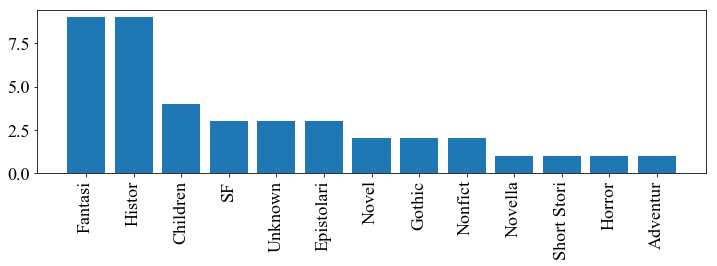

In [452]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = [
    'Times New Roman', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana'
]
# rcParams['font'] = font_path

rcParams['font.size'] = 18

prop = fm.FontProperties(fname=font_path)
# ax.set_title('This is some random font', fontproperties=prop, size=32)

# data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
# names = list(data.keys())
# values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(12, 3))#, figsize=(9, 3), sharey=True)
# axs.bar(names, values)
axs.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.xticks(rotation=90)
plt.fontproperties = prop
plt.savefig('../plot/correct_labels.png')
# fig.suptitle('Categorical Plotting')